# 第13回演習「強化学習」

この演習では、報酬に基づいて行動する強化学習の方法を習得します。<br />
グレイの背景のプログラムは上から順に、1つずつ実行していきましょう。<br />
<img src="http://pfe.p.cyber-u.ac.jp/img/Python/Week13/rat.png" style="width:200px">
<hr />

## 1) プログラム冒頭

In [2]:
import numpy as np
乱数発生器 = np.random.RandomState(9) # 再現性を担保するため
試行の中のステップ数 = 10
最大の試行エピソード数 = 100
これだけ1エピソードで報酬を得たら終了 = 9 # 1エピソードで得られる最大の報酬に達したら打ち切る
Qテーブル = np.array([[0.0, 0.0],[0.0, 0.0]]) # intにしたくないので 0.0 とする

状態遷移図 = {0:{},1:{}} # Pythonの2次元ディクショナリ
状態遷移図[0][0]=[1,0]; # 電源状態0(オフ)で行動0(電源ボタン押す)の時、電源状態1(オン)に遷移し報酬0
状態遷移図[0][1]=[0,0]; # 電源状態0(オフ)で行動1(えさボタン押す)の時、電源状態0(オフ)のままで報酬0
状態遷移図[1][0]=[0,0]; # 電源状態1(オン)で行動0(電源ボタン押す)の時、電源状態0(オフ)に遷移し報酬0
状態遷移図[1][1]=[1,1]; # 電源状態1(オン)で行動1(えさボタン押す)の時、電源状態1(オン)のままで報酬1

print(Qテーブル)
print(状態遷移図)

[[0. 0.]
 [0. 0.]]
{0: {0: [1, 0], 1: [0, 0]}, 1: {0: [0, 0], 1: [1, 1]}}


## 2) Qテーブルの中身を表示する関数

In [3]:
def Qテーブルの中身を表示(Qテーブル):
    行数 = Qテーブル.shape[0]
    列数 = Qテーブル.shape[1]    
    for 行 in range(行数):
        for 列 in range(列数):
            print("Q(%d,%d): %.7f" % (行,列,Qテーブル[行][列]))

Qテーブルの中身を表示(Qテーブル)

Q(0,0): 0.0000000
Q(0,1): 0.0000000
Q(1,0): 0.0000000
Q(1,1): 0.0000000


## 小出しの任意課題1)
<span style="background-color:#FFFF99">
Qテーブルの中身を何らかの2×2行列に書き換えて、<br />
再度「Qテーブルの中身を表示」関数の動作確認をしましょう。<br />
その後、忘れずにQテーブルの中身を元に戻してください。
    </span><hr />

In [4]:
# 念のため、Qテーブルの中身を変えてもう一度動作確認


## 3) QテーブルからQ値最大の行動を選ぶ関数

In [5]:
def QテーブルからQ値最大の行動を選ぶ(Qテーブル,この電源状態):
    最大値 = np.max(Qテーブル[この電源状態])
    最大値の場所 = [] # 最大が複数あったら全て返させる。そのための配列。
    for i in range(len(Qテーブル[この電源状態])):
        if 最大値 == Qテーブル[この電源状態][i]:
            最大値の場所.append(i)
    return 最大値の場所

print(QテーブルからQ値最大の行動を選ぶ(Qテーブル,0))

[0, 1]


## 小出しの任意課題2)
<span style="background-color:#FFFF99">
Qテーブルの中身を何らかの2×2行列に書き換えて、<br />
再度「QテーブルからQ値最大の行動を選ぶ関数」の動作確認をしましょう。<br />
その後、忘れずにQテーブルの中身を元に戻してください。
    </span><hr />

## 4) ε-グリーディ法で次の行動を決定する関数

In [6]:
def εグリーディ法で次の行動を決定(この電源状態, 試行したエピソード数):
    # ここはεグリーディ法の改良版
    ランダム行動の選択率ε = 0.5*(1/(試行したエピソード数+1)) # 試行が増えるたびに、最適な行動を選びやすくなる
    print("ε:",ランダム行動の選択率ε) # デバッグ用出力
    乱数_0から1まで = 乱数発生器.uniform(0, 1)
    print("乱数:",乱数_0から1まで)
    if ランダム行動の選択率ε <= 乱数_0から1まで: # 乱数がε以上なら、QテーブルからQ値最大の行動を選ぶ
        選んだ行動 = QテーブルからQ値最大の行動を選ぶ(Qテーブル,この電源状態)
        print("Q値最大の行動:",選んだ行動)
        次の行動 = 乱数発生器.choice(選んだ行動) # Q値最大の行動は複数あり得るので、その時は複数からランダム
        print("Q値最大の行動を選びました")
    else: # 乱数の値がイプシロンより小さければ、Qテーブルは見ずに「次の行動」をランダムに選ぶ
        次の行動 = 乱数発生器.choice([0, 1]) # 0か1か
        print("ランダムに選びました")
    return 次の行動

# 電源オフ、エピソード番号0の時の次の行動を出力
print("次の行動:",εグリーディ法で次の行動を決定(0, 0)) 
# ↑ 出力結果が0なら次の行動は「電源ボタンを押す」、1なら「えさボタンを押す」

ε: 0.5
乱数: 0.010374153885699955
ランダムに選びました
次の行動: 0


## 小出しの任意課題3)
<span style="background-color:#FFFF99">
試行したエピソード数が0の時は「ランダム行動の選択率ε」は0.5でした。<br />
試行したエピソード数が5の時には「ランダム行動の選択率ε」はいくつになるでしょうか?
    </span><hr />

In [7]:
print("次の行動:",εグリーディ法で次の行動を決定(0, 5)) 

ε: 0.08333333333333333
乱数: 0.4991303644759453
Q値最大の行動: [0, 1]
Q値最大の行動を選びました
次の行動: 0


## 5) Qテーブルを更新する関数

In [8]:
def Qテーブルを更新(Qテーブル, 電源状態, 行動, 報酬, 次の電源状態):
    割引率γ = 0.9
    学習率α = 0.5
    next_maxQ=max(Qテーブル[次の電源状態])
    Qテーブル[電源状態,行動] = (1-学習率α)*Qテーブル[電源状態,行動]+学習率α*(報酬+割引率γ*next_maxQ)
    return Qテーブル

# 「電源オフの時に電源ボタンを押し、報酬は0で、次の電源状態はオンになった」時のQテーブル更新
Qテーブル = Qテーブルを更新(Qテーブル, 0, 0, 0, 1)
Qテーブルの中身を表示(Qテーブル)

Q(0,0): 0.0000000
Q(0,1): 0.0000000
Q(1,0): 0.0000000
Q(1,1): 0.0000000


## 小出しの任意課題4)
<span style="background-color:#FFFF99">
「電源オンの時にえさボタンを押し、報酬は1で、次の電源状態はオフになった」時の<br />
 Qテーブル更新をテストしてみましょう。Q(1,1)は 0.5000000 になるでしょうか?<br />
 テストの後、忘れずにQテーブルの中身を [[0.0, 0.0],[0.0, 0.0]] に戻してください。
 </span><hr />

In [9]:
# 「電源オンの時にえさボタンを押し、報酬は1で、次の電源状態はオフになった」時のQテーブル更新
Qテーブル = Qテーブルを更新(Qテーブル, 1, 1, 1, 0)
Qテーブルの中身を表示(Qテーブル)

Q(0,0): 0.0000000
Q(0,1): 0.0000000
Q(1,0): 0.0000000
Q(1,1): 0.5000000


## 6) メインの処理

In [10]:
乱数発生器 = np.random.RandomState(9) # 何度も乱数を発生させたので、改めて種を入れ直す
Qテーブル = np.array([[0.0, 0.0],[0.0, 0.0]]) # Qテーブルも戻す

##### これよりメインの処理 #####
for 試行エピソード番号 in range(最大の試行エピソード数): # 最大が100なら、rangeは0から99
    電源状態 = 0
    このエピソードでの報酬 = 0
 
    for ステップ in range(試行の中のステップ数):  # 試行の中での繰り返し
        行動 = εグリーディ法で次の行動を決定(電源状態, 試行エピソード番号) 
        次の電源状態, 報酬 = 状態遷移図[電源状態][行動]
        print("電源状態:",電源状態,"取った行動:", 行動, "得た報酬:",報酬)
        このエピソードでの報酬 = このエピソードでの報酬 + 報酬  # 得た報酬を足し込む
        Qテーブル = Qテーブルを更新(Qテーブル, 電源状態, 行動, 報酬, 次の電源状態)
        電源状態 = 次の電源状態

    print('試行したエピソードの数',試行エピソード番号+1,'このエピソードでの報酬',このエピソードでの報酬)
    Qテーブルの中身を表示(Qテーブル)
    if このエピソードでの報酬 >= これだけ1エピソードで報酬を得たら終了:
        break

ε: 0.5
乱数: 0.010374153885699955
ランダムに選びました
電源状態: 0 取った行動: 0 得た報酬: 0
ε: 0.5
乱数: 0.4991303644759453
ランダムに選びました
電源状態: 1 取った行動: 0 得た報酬: 0
ε: 0.5
乱数: 0.13382952895927658
ランダムに選びました
電源状態: 0 取った行動: 1 得た報酬: 0
ε: 0.5
乱数: 0.01332201226471863
ランダムに選びました
電源状態: 0 取った行動: 0 得た報酬: 0
ε: 0.5
乱数: 0.41850818051045247
ランダムに選びました
電源状態: 1 取った行動: 0 得た報酬: 0
ε: 0.5
乱数: 0.13861327680989832
ランダムに選びました
電源状態: 0 取った行動: 1 得た報酬: 0
ε: 0.5
乱数: 0.3454986400504001
ランダムに選びました
電源状態: 0 取った行動: 1 得た報酬: 0
ε: 0.5
乱数: 0.315708867300742
ランダムに選びました
電源状態: 0 取った行動: 0 得た報酬: 0
ε: 0.5
乱数: 0.9509640316267165
Q値最大の行動: [0, 1]
Q値最大の行動を選びました
電源状態: 1 取った行動: 0 得た報酬: 0
ε: 0.5
乱数: 0.9679040811889423
Q値最大の行動: [0, 1]
Q値最大の行動を選びました
電源状態: 0 取った行動: 1 得た報酬: 0
試行したエピソードの数 1 このエピソードでの報酬 0
Q(0,0): 0.0000000
Q(0,1): 0.0000000
Q(1,0): 0.0000000
Q(1,1): 0.0000000
ε: 0.25
乱数: 0.5727598155694092
Q値最大の行動: [0, 1]
Q値最大の行動を選びました
電源状態: 0 取った行動: 0 得た報酬: 0
ε: 0.25
乱数: 0.13600697865261857
ランダムに選びました
電源状態: 1 取った行動: 0 得た報酬: 0
ε: 0.25
乱数: 0.5478377830464816
Q値最大の行動: [0,

## 7) これまでのプログラムをまとめたもの<br />(途中のデバッグ用出力は省く)

電源状態: 0 取った行動: 0 得た報酬: 0
電源状態: 1 取った行動: 0 得た報酬: 0
電源状態: 0 取った行動: 1 得た報酬: 0
電源状態: 0 取った行動: 0 得た報酬: 0
電源状態: 1 取った行動: 0 得た報酬: 0
電源状態: 0 取った行動: 1 得た報酬: 0
電源状態: 0 取った行動: 1 得た報酬: 0
電源状態: 0 取った行動: 0 得た報酬: 0
電源状態: 1 取った行動: 0 得た報酬: 0
電源状態: 0 取った行動: 1 得た報酬: 0
試行したエピソードの数 1 このエピソードでの報酬 0
Q(0,0): 0.0000000
Q(0,1): 0.0000000
Q(1,0): 0.0000000
Q(1,1): 0.0000000
電源状態: 0 取った行動: 0 得た報酬: 0
電源状態: 1 取った行動: 0 得た報酬: 0
電源状態: 0 取った行動: 1 得た報酬: 0
電源状態: 0 取った行動: 1 得た報酬: 0
電源状態: 0 取った行動: 0 得た報酬: 0
電源状態: 1 取った行動: 0 得た報酬: 0
電源状態: 0 取った行動: 1 得た報酬: 0
電源状態: 0 取った行動: 1 得た報酬: 0
電源状態: 0 取った行動: 1 得た報酬: 0
電源状態: 0 取った行動: 0 得た報酬: 0
試行したエピソードの数 2 このエピソードでの報酬 0
Q(0,0): 0.0000000
Q(0,1): 0.0000000
Q(1,0): 0.0000000
Q(1,1): 0.0000000
電源状態: 0 取った行動: 0 得た報酬: 0
電源状態: 1 取った行動: 0 得た報酬: 0
電源状態: 0 取った行動: 0 得た報酬: 0
電源状態: 1 取った行動: 0 得た報酬: 0
電源状態: 0 取った行動: 0 得た報酬: 0
電源状態: 1 取った行動: 0 得た報酬: 0
電源状態: 0 取った行動: 0 得た報酬: 0
電源状態: 1 取った行動: 1 得た報酬: 1
電源状態: 1 取った行動: 1 得た報酬: 1
電源状態: 1 取った行動: 1 得た報酬: 1
試行したエピソードの数 3 このエピソードでの報酬 3
Q(0,0): 0.0000000
Q(0,

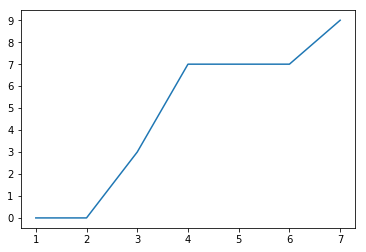

In [29]:
import numpy as np
import matplotlib.pyplot as plt

乱数発生器 = np.random.RandomState(9) # 再現性を担保するため
試行の中のステップ数 = 10
最大の試行エピソード数 = 100
これだけ1エピソードで報酬を得たら終了 = 9 # 1エピソードで得られる最大の報酬に達したら打ち切る
Qテーブル = np.array([[0.0, 0.0],[0.0, 0.0]]) # intにしたくないので 0.0 とする

状態遷移図 = {0:{},1:{}} # Pythonの2次元ディクショナリ
状態遷移図[0][0]=[1,0]; # 電源状態0(オフ)で行動0(電源ボタン押す)の時、電源状態1(オン)に遷移し報酬0
状態遷移図[0][1]=[0,0]; # 電源状態0(オフ)で行動1(えさボタン押す)の時、電源状態0(オフ)のままで報酬0
状態遷移図[1][0]=[0,0]; # 電源状態1(オン)で行動0(電源ボタン押す)の時、電源状態0(オフ)に遷移し報酬0
状態遷移図[1][1]=[1,1]; # 電源状態1(オン)で行動1(えさボタン押す)の時、電源状態1(オン)のままで報酬1

def Qテーブルの中身を表示(Qテーブル):
    行数 = Qテーブル.shape[0]
    列数 = Qテーブル.shape[1]    
    for 行 in range(行数):
        for 列 in range(列数):
            print("Q(%d,%d): %.7f" % (行,列,Qテーブル[行][列]))

def QテーブルからQ値最大の行動を選ぶ(Qテーブル,この電源状態):
    最大値 = np.max(Qテーブル[この電源状態])
    最大値の場所 = []
    for i in range(len(Qテーブル[この電源状態])):
        if 最大値 == Qテーブル[この電源状態][i]:
            最大値の場所.append(i)
    return 最大値の場所
            
def εグリーディ法で次の行動を決定(この電源状態, 試行したエピソード数):
    # ここはεグリーディ法の改良版
    ランダム行動の選択率ε = 0.5*(1/(試行したエピソード数+1)) # 試行が増えるたびに、最適な行動を選びやすくなる
    乱数_0から1まで = 乱数発生器.uniform(0, 1)    
    if ランダム行動の選択率ε <= 乱数_0から1まで: # 乱数がε以上なら、QテーブルからQ値最大の行動を選ぶ
        選んだ行動 = QテーブルからQ値最大の行動を選ぶ(Qテーブル,この電源状態)        
        次の行動 = 乱数発生器.choice(選んだ行動) # Q値最大の行動は複数あり得るので、その時は複数からランダム        
    else: # 乱数の値がイプシロンより小さければ、Qテーブルは見ずに「次の行動」をランダムに選ぶ
        次の行動 = 乱数発生器.choice([0, 1]) # 0か1か        
    return 次の行動

def Qテーブルを更新(Qテーブル, 電源状態, 行動, 報酬, 次の電源状態):
    割引率γ = 0.9
    学習率α = 0.5
    next_maxQ=max(Qテーブル[次の電源状態])
    Qテーブル[電源状態,行動] = (1-学習率α)*Qテーブル[電源状態,行動]+学習率α*(報酬+割引率γ*next_maxQ)
    return Qテーブル

##### これよりメインの処理 #####
このエピソードでの報酬リスト = []
最後のエピソード = 0
for 試行エピソード番号 in range(最大の試行エピソード数): # 最大が100なら、rangeは0から99
    電源状態 = 0
    このエピソードでの報酬 = 0
    for ステップ in range(試行の中のステップ数):  # 試行の中での繰り返し
        行動 = εグリーディ法で次の行動を決定(電源状態, 試行エピソード番号) 
        次の電源状態, 報酬 = 状態遷移図[電源状態][行動]
        print("電源状態:",電源状態,"取った行動:", 行動, "得た報酬:",報酬)
        このエピソードでの報酬 = このエピソードでの報酬 + 報酬  # 得た報酬を足し込む
        Qテーブル = Qテーブルを更新(Qテーブル, 電源状態, 行動, 報酬, 次の電源状態)
        電源状態 = 次の電源状態

    このエピソードでの報酬リスト.append(このエピソードでの報酬)
    print('試行したエピソードの数',試行エピソード番号+1,'このエピソードでの報酬',このエピソードでの報酬)    
    Qテーブルの中身を表示(Qテーブル)
    if このエピソードでの報酬 >= これだけ1エピソードで報酬を得たら終了:
        最後のエピソード = 試行エピソード番号
        break
plt.figure()
plt.plot([i+1 for i in range(len(このエピソードでの報酬リスト))], このエピソードでの報酬リスト)
y_min, y_max = 0, 9
# y軸の目盛りを1毎に設定
plt.yticks(range(y_min, y_max + 1, 1))
plt.show()

## 小出しの任意課題5)
<span style="background-color:#FFFF99">
上記のプログラム #6 を改造し「試行したエピソードが増えるにつれて、<br />
    エピソード毎の報酬が変化していく様子」を
図示しましょう。
 </span><hr />

第13回第3章の演習はここまでです。引き続き、第4章の講義を見ましょう。